<a href="https://colab.research.google.com/github/Bordin-Lab/election-pelotas/blob/main/Teste_de_Kolmogorov_Smirnov_Elei%C3%A7%C3%A3o_2016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

try:
    df = pd.read_excel('/content/Eleição 2016 - Teste de Kolgomorov- Smirnov.xlsx')
except FileNotFoundError:
    print("Error: The specified file was not found. Please check the path.")
    # You might want to stop execution or handle this error appropriately
except Exception as e:
    print(f"An error occurred while reading the file: {e}")

In [ ]:
# Assuming the column with vote counts is named 'Número de votos ' based on the dataframe display.
# If the column name is different, please update the code below.
vote_counts = df['Número de votos ']
display(vote_counts.head())

,Número de votos
0,6721
1,4177
2,4166
3,3637
4,3622


In [ ]:
from scipy.stats import kstest
import numpy as np

# Perform the Kolmogorov-Smirnov test
# We'll test against a normal distribution for now.
# If you have a different distribution in mind, please specify.
ks_statistic, p_value = kstest(vote_counts, 'norm', args=(np.mean(vote_counts), np.std(vote_counts)))

print(f"Kolmogorov-Smirnov test statistic: {ks_statistic}")
print(f"P-value: {p_value}")

Kolmogorov-Smirnov test statistic: 0.2767837805990318
P-value: 2.5796507926572694e-23


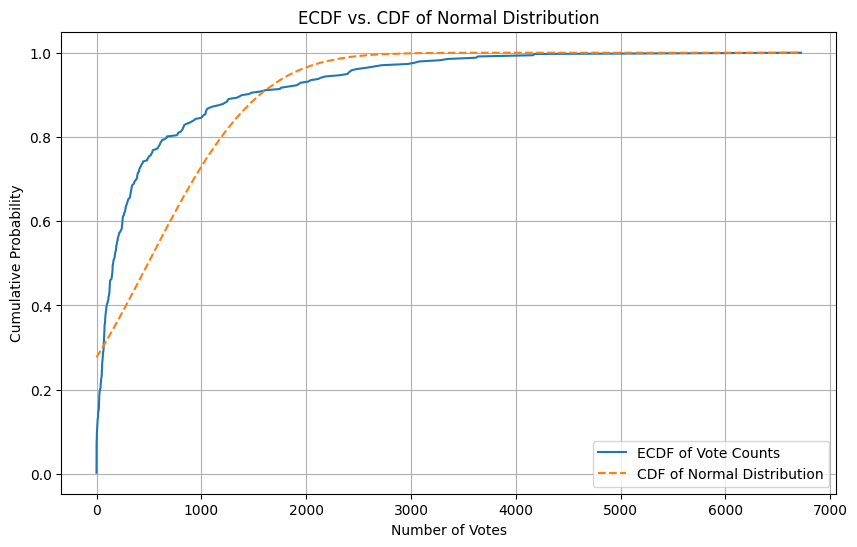

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm

# Calculate the ECDF of the sample data
ecdf = ECDF(vote_counts)

# Generate data for the theoretical CDF (normal distribution)
# We use the mean and standard deviation calculated from the sample data
mean_vote = np.mean(vote_counts)
std_vote = np.std(vote_counts)

# Create points for the x-axis for plotting the CDF
x_values = np.sort(vote_counts)
cdf_values = norm.cdf(x_values, mean_vote, std_vote)

# Plot the ECDF and the theoretical CDF
plt.figure(figsize=(10, 6))
plt.plot(ecdf.x, ecdf.y, label='ECDF of Vote Counts')
plt.plot(x_values, cdf_values, label='CDF of Normal Distribution', linestyle='--')
plt.xlabel('Number of Votes')
plt.ylabel('Cumulative Probability')
plt.title('ECDF vs. CDF of Normal Distribution')
plt.legend()
plt.grid(True)
plt.show()